In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [ ]:
#import sys
#sys.executable

In [ ]:
#%pip install scikit-learn

In [2]:
#Set the path where the file is located
path = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/wholesale_diamonds_2012_2023.csv"
diamond_df = pd.read_csv(path)
diamond_df

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [3]:
#Rename column names to using the conventional python naming style
diamond_df=diamond_df.rename(columns={'cost (dollars)': 'cost_dollars',
                      'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [4]:
#display summary statistics
diamond_df.describe()

,index,carat,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
count,407280.000000,405232.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000
mean,16969.500000,0.797742,61.747793,57.457113,4372.968506,5.730165,5.732369,3.538519,2017.500000
std,9797.646092,0.474774,1.434209,2.239837,4503.620949,1.122960,1.114266,0.712168,3.452057
min,0.000000,0.200000,43.000000,43.000000,-998.000000,0.000000,0.000000,0.000000,2012.000000
25%,8484.750000,0.400000,61.000000,56.000000,1043.000000,4.710000,4.720000,2.910000,2014.750000
50%,16969.500000,0.700000,61.800000,57.000000,2655.000000,5.690000,5.710000,3.520000,2017.500000
75%,25454.250000,1.040000,62.500000,59.000000,5960.000000,6.530000,6.530000,4.030000,2020.250000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [5]:
#Display summary statistics
diamond_df.describe(include=['object','category'])

,cut,color,clarity
count,407280,407280,407280
unique,5,7,8
top,Ideal,G,SI1
freq,162876,86064,98844


In [6]:
data_types = diamond_df.dtypes

# Print or inspect the data types
print(data_types)


index             int64
carat           float64
cut              object
color            object
clarity          object
depth           float64
table           float64
cost_dollars      int64
length_mm       float64
width_mm        float64
height_mm       float64
year              int64
dtype: object


In [ ]:
#diamond_df['year'] = pd.to_datetime(diamond_df['year'], format='%Y')

# Print or inspect the DataFrame with the converted datetime column
#print(diamond_df)


In [7]:
# Check for missing values in the DataFrame
missing_values = diamond_df.isnull()
# Display the DataFrame with True for missing values and False for non-missing values
print("\nDataFrame with Missing Values:")
print(missing_values)


DataFrame with Missing Values:
        index  carat    cut  color  clarity  depth  table  cost_dollars  \
0       False  False  False  False    False  False  False         False   
1       False  False  False  False    False  False  False         False   
2       False  False  False  False    False  False  False         False   
3       False  False  False  False    False  False  False         False   
4       False  False  False  False    False  False  False         False   
...       ...    ...    ...    ...      ...    ...    ...           ...   
407275  False  False  False  False    False  False  False         False   
407276  False  False  False  False    False  False  False         False   
407277  False  False  False  False    False  False  False         False   
407278  False  False  False  False    False  False  False         False   
407279  False  False  False  False    False  False  False         False   

        length_mm  width_mm  height_mm   year  
0           False  

In [8]:
# Display the count of missing values in each column
print("\nCount of Missing Values in Each Column:")
print(diamond_df.isnull().sum())


Count of Missing Values in Each Column:
index              0
carat           2048
cut                0
color              0
clarity            0
depth              0
table              0
cost_dollars       0
length_mm          0
width_mm           0
height_mm          0
year               0
dtype: int64


In [9]:
diamond_df.dropna(inplace=True)

In [10]:
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [ ]:
# Drop rows with missing values
#df_cleaned = diamond_df.dropna()
# Display the cleaned DataFrame
#print(df_cleaned)

In [11]:
# Display the count of missing values in each column
print("\nCount of Missing Values in Each Column:")
print(diamond_df.isnull().sum())


Count of Missing Values in Each Column:
index           0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
cost_dollars    0
length_mm       0
width_mm        0
height_mm       0
year            0
dtype: int64


In [12]:
print(diamond_df['length_mm'].unique())

[ 3.95  4.05  4.2   4.34  3.94  4.    4.25  3.93  3.88  4.35  3.79  4.23
  4.21  3.85  4.39  4.44  3.97  3.96  4.04  4.01  3.92  4.29  4.13  4.49
  4.36  4.33  3.91  4.3   4.78  4.28  4.19  4.03  4.02  4.65  4.07  5.7
  6.45  5.68  5.81  6.27  5.77  6.    5.8   5.85  5.87  5.96  5.73  5.98
  5.72  5.64  5.57  5.65  5.56  6.11  6.03  5.89  5.69  5.74  5.53  5.62
  5.83  5.66  5.79  5.78  5.92  5.97  6.01  5.39  5.33  6.83  5.41  5.24
  5.67  5.71  5.76  5.6   5.19  5.9   6.39  5.34  5.88  5.11  6.07  6.29
  6.31  5.82  6.49  5.94  5.48  6.02  5.91  6.17  6.61  6.19  5.43  6.37
  6.46  5.75  5.93  5.84  6.21  6.16  6.15  5.63  6.14  5.49  4.37  4.47
  4.31  4.41  4.26  4.54  4.48  4.5   4.56  4.94  5.15  5.86  5.23  6.08
  6.62  6.26  5.99  6.73  5.52  5.61  6.04  6.43  6.36  6.34  5.2   5.37
  6.06  5.51  6.05  6.9   6.24  6.41  5.36  5.47  6.09  6.6   6.3   6.75
  5.54  6.22  6.78  6.12  6.38  6.82  5.44  4.09  4.57  4.32  4.52  4.43
  4.42  4.45  4.46  5.45  6.93  6.4   5.25  6.55  5.

In [13]:
print(diamond_df['width_mm'].unique())

[ 3.98  4.07  4.23  4.35  3.96  4.05  4.28  3.9   3.84  4.37  3.75  4.26
  4.27  3.92  4.43  4.47  4.01  3.94  3.97  3.99  4.03  4.06  4.31  4.16
  4.51  4.55  4.42  4.38  3.95  3.88  4.33  4.29  4.32  4.84  4.    4.24
  4.25  4.22  4.04  4.12  4.67  5.72  6.33  5.73  5.85  5.95  5.78  5.96
  5.79  5.8   6.    5.82  5.74  5.94  5.76  5.69  5.83  5.61  5.53  5.59
  5.58  6.09  5.99  5.86  5.68  5.77  5.56  5.81  5.87  5.65  5.75  5.89
  5.92  6.03  5.44  5.37  6.9   5.88  5.84  5.26  5.7   5.9   5.64  5.51
  5.22  5.93  6.36  5.15  6.1   6.21  6.22  6.45  6.01  5.41  6.05  5.66
  5.91  6.13  6.55  5.35  6.02  5.46  6.23  6.41  6.34  5.71  5.67  6.19
  5.43  6.07  6.06  4.34  4.2   4.5   4.57  4.52  4.53  4.58  5.    5.11
  5.27  6.04  6.53  6.65  5.54  5.52  5.63  6.39  6.12  5.21  5.4   5.98
  6.83  5.6   6.37  6.31  5.38  6.18  5.97  5.49  5.57  5.62  6.26  6.67
  6.75  6.29  6.74  4.08  4.59  4.41  4.4   4.39  5.48  6.88  6.11  5.3
  6.48  5.47  5.13  6.49  6.25  6.43  6.27  6.14  5.

In [14]:
print(diamond_df['height_mm'].unique())

[ 2.43  2.31  2.63  2.75  2.48  2.47  2.39  2.73  2.46  2.33  2.71  2.27
  2.66  2.62  2.59  2.41  2.4   2.42  2.44  2.52  2.78  2.76  2.79  2.54
  2.64  2.67  2.7   2.69  2.68  2.96  2.45  2.49  2.53  2.55  2.87  3.57
  3.52  3.56  3.72  4.07  3.58  3.59  3.63  3.67  3.6   3.68  3.62  3.47
  3.46  3.32  3.93  3.95  3.64  3.53  3.43  3.5   3.48  3.65  3.55  3.54
  3.49  3.51  3.33  3.3   3.38  4.13  3.35  3.79  3.61  3.23  3.4   3.19
  3.94  3.08  3.75  3.18  4.03  4.09  3.69  3.76  3.87  3.83  3.31  3.44
  3.74  3.8   3.88  4.    3.98  3.66  3.7   3.78  3.84  4.01  4.18  3.45
  2.74  2.72  2.8   2.77  2.9   2.82  3.85  3.73  4.08  3.22  3.34  3.86
  3.89  3.96  3.81  3.42  3.91  3.71  3.77  4.06  4.11  4.23  3.92  3.9
  2.83  4.04  3.82  3.37  4.21  3.27  4.1   3.99  3.97  3.41  3.24  3.17
  4.29  3.21  4.02  2.88  2.56  2.65  2.61  4.16  3.2   4.14  4.26  4.12
  4.7   2.5   4.19  3.13  4.05  3.39  3.26  4.27  4.2   4.15  2.97  3.36
  4.42  4.38  3.29  0.    4.78  2.99  3.16  2.51  2.

In [15]:
#count the number of rows with width less than or equal to zero
negative_or_zero_width_count = (diamond_df['width_mm'] <= 0).sum()

print("Number of values in 'width_mm' with width less than or equal to zero:", negative_or_zero_width_count)

Number of values in 'width_mm' with width less than or equal to zero: 36


In [16]:
#count the number of rows with width less than or equal to zero
negative_or_zero_length_count = (diamond_df['length_mm'] <= 0).sum()

print("Number of values in 'length_mm' with length less than or equal to zero:", negative_or_zero_length_count)

Number of values in 'length_mm' with length less than or equal to zero: 48


In [17]:
#count the number of rows with width less than or equal to zero
negative_or_zero_height_count = (diamond_df['height_mm'] <= 0).sum()

print("Number of values in 'height_mm' with height less than or equal to zero:", negative_or_zero_height_count)

Number of values in 'height_mm' with height less than or equal to zero: 132


In [18]:
result = diamond_df[(diamond_df['width_mm'] == 0) & (diamond_df['height_mm'] == 0)]

# If result is not empty, it means there are rows where both 'width_mm' and 'height_mm' have a value of 0
if not result.empty:
    print("Rows with value 0 in both columns found.")
    print(result)
else:
    print("No rows with value 0 in both columns.")

Rows with value 0 in both columns found.
        index  carat        cut color clarity  depth  table  cost_dollars  \
7476     7476   1.00  Very Good     H     VS2   63.3   53.0          5139   
31131   31131   0.71       Good     F     SI2   64.1   60.0          2130   
31132   31132   0.71       Good     F     SI2   64.1   60.0          2130   
41416    7476   1.00  Very Good     H     VS2   63.3   53.0          5175   
65071   31131   0.71       Good     F     SI2   64.1   60.0          2388   
65072   31132   0.71       Good     F     SI2   64.1   60.0          1870   
75356    7476   1.00  Very Good     H     VS2   63.3   53.0          5555   
99011   31131   0.71       Good     F     SI2   64.1   60.0          2182   
99012   31132   0.71       Good     F     SI2   64.1   60.0          2145   
109296   7476   1.00  Very Good     H     VS2   63.3   53.0          5622   
132951  31131   0.71       Good     F     SI2   64.1   60.0          2237   
132952  31132   0.71       Good    

In [19]:
result = diamond_df[(diamond_df['width_mm'] == 0) & (diamond_df['length_mm'] == 0)]

# If result is not empty, it means there are rows where both 'width_mm' and 'length_mm' have a value of 0
if not result.empty:
    print("Rows with value 0 in both columns found.")
    print(result)
else:
    print("No rows with value 0 in both columns.")

Rows with value 0 in both columns found.
        index  carat        cut color clarity  depth  table  cost_dollars  \
7476     7476   1.00  Very Good     H     VS2   63.3   53.0          5139   
31131   31131   0.71       Good     F     SI2   64.1   60.0          2130   
31132   31132   0.71       Good     F     SI2   64.1   60.0          2130   
41416    7476   1.00  Very Good     H     VS2   63.3   53.0          5175   
65071   31131   0.71       Good     F     SI2   64.1   60.0          2388   
65072   31132   0.71       Good     F     SI2   64.1   60.0          1870   
75356    7476   1.00  Very Good     H     VS2   63.3   53.0          5555   
99011   31131   0.71       Good     F     SI2   64.1   60.0          2182   
99012   31132   0.71       Good     F     SI2   64.1   60.0          2145   
109296   7476   1.00  Very Good     H     VS2   63.3   53.0          5622   
132951  31131   0.71       Good     F     SI2   64.1   60.0          2237   
132952  31132   0.71       Good    

In [20]:
result = diamond_df[(diamond_df['height_mm'] == 0) & (diamond_df['length_mm'] == 0)]

# If result is not empty, it means there are rows where both 'height_mm' and 'length_mm' have a value of 0
if not result.empty:
    print("Rows with value 0 in both columns found.")
    print(result)
else:
    print("No rows with value 0 in both columns.")

Rows with value 0 in both columns found.
        index  carat        cut color clarity  depth  table  cost_dollars  \
6995     6995   1.07      Ideal     F     SI2   61.6   56.0          4954   
7476     7476   1.00  Very Good     H     VS2   63.3   53.0          5139   
31131   31131   0.71       Good     F     SI2   64.1   60.0          2130   
31132   31132   0.71       Good     F     SI2   64.1   60.0          2130   
40935    6995   1.07      Ideal     F     SI2   61.6   56.0          5280   
41416    7476   1.00  Very Good     H     VS2   63.3   53.0          5175   
65071   31131   0.71       Good     F     SI2   64.1   60.0          2388   
65072   31132   0.71       Good     F     SI2   64.1   60.0          1870   
74875    6995   1.07      Ideal     F     SI2   61.6   56.0          5077   
75356    7476   1.00  Very Good     H     VS2   63.3   53.0          5555   
99011   31131   0.71       Good     F     SI2   64.1   60.0          2182   
99012   31132   0.71       Good    

In [21]:
#count the number of rows with width less than or equal to zero
negative_or_zero_table_count = (diamond_df['table'] <= 0).sum()

print("Number of values in 'table' with value less than or equal to zero:", negative_or_zero_table_count)

Number of values in 'table' with value less than or equal to zero: 0


In [22]:
#count the number of rows with width less than or equal to zero
negative_or_zero_depth_count = (diamond_df['depth'] <= 0).sum()

print("Number of values in 'depth' with value less than or equal to zero:", negative_or_zero_depth_count)

Number of values in 'depth' with value less than or equal to zero: 0


In [23]:
#count the number of rows with width less than or equal to zero
negative_or_zero_carat_count = (diamond_df['carat'] <= 0).sum()

print("Number of values in 'carat' with value less than or equal to zero:", negative_or_zero_carat_count)

Number of values in 'carat' with value less than or equal to zero: 0


In [24]:
#check for unique values in the year column
print(diamond_df['year'].unique())

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [25]:
#check for unique values in the cost_dollars column
print(diamond_df['cost_dollars'].unique())

[ 326  327  334 ... -238 -761 -806]


In [ ]:
#sns.boxplot(x=df['cost_dollars'])
#plt.show()

In [26]:
# Count the number of rows with negative or zero prices
negative_or_zero_values_count = (diamond_df['cost_dollars'] <= 0).sum()

print("Number of rows with negative or zero prices in 'cost_dollars':", negative_or_zero_values_count)


Number of rows with negative or zero prices in 'cost_dollars': 2040


In [ ]:
#diamond_df = diamond_df[(diamond_df['width_mm'] != 0) & (diamond_df['height_mm'] != 0) & (diamond_df['length_mm'] != 0)]

# Alternatively, you can use the any() method to check for 0 in any of the specified columns
# df = df[(df[['column_1', 'column_2', 'column_3']] != 0).all(axis=1)]

In [ ]:
#count the number of rows with negative prices
#negative_values_count = (diamond_df['cost_dollars'] < 0).sum()

#print("Number of negative values in 'cost_dollars':", negative_values_count)

In [ ]:
#count the number of rows with negative prices
#zero_values_count = (diamond_df['cost_dollars'] == 0).sum()

#print("Number of zero values in 'cost_dollars':", zero_values_count)

In [27]:
# Identify numeric columns
numeric_columns = diamond_df.select_dtypes(include=['number']).columns

# Drop rows where at least one numeric column has a value less than or equal to 0
diamond_df = diamond_df[(diamond_df[numeric_columns] > 0).all(axis=1)]

In [28]:
# Save the cleaned DataFrame to a new CSV file
diamond_df.to_csv('cleaned_diamond_data.csv', index=False)

In [29]:
#display summary statistics
diamond_df.describe()

,index,carat,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
count,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000,403049.000000
mean,16972.458120,0.797543,61.747950,57.457361,4396.659143,5.730381,5.732401,3.539603,2017.500254
std,9796.286636,0.474654,1.434202,2.240105,4500.786342,1.121121,1.112858,0.709608,3.452029
min,1.000000,0.200000,43.000000,43.000000,304.000000,3.730000,3.680000,1.070000,2012.000000
25%,8491.000000,0.400000,61.000000,56.000000,1053.000000,4.710000,4.720000,2.910000,2015.000000
50%,16974.000000,0.700000,61.800000,57.000000,2676.000000,5.690000,5.710000,3.520000,2018.000000
75%,25454.000000,1.040000,62.500000,59.000000,5983.000000,6.530000,6.530000,4.030000,2021.000000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [ ]:
#Check for duplicates if any
#duplicates = diamond_df[diamond_df.duplicated()]

# Display duplicate rows
#print("Duplicate Rows except first occurrence:")
#print(duplicates)


In [ ]:
# Check for duplicates based on specific columns
#duplicates_subset = diamond_df_cleaned[diamond_df_cleaned.duplicated(subset=['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'cost_dollars', 'length_mm', 'width_mm', 'height_mm', 'year'])]

# Display duplicate rows based on specific columns
#print("Duplicate Rows based on specific columns:")
#print(duplicates_subset)


In [30]:
#Display summary statistics
diamond_df.describe(include=['object','category'])

,cut,color,clarity
count,403049,403049,403049
unique,5,7,8
top,Ideal,G,SI1
freq,161172,85221,97876


In [31]:
# Display the count of each cut type
cut_counts = diamond_df['cut'].value_counts()
# Print the result
print("Count of diamonds for each cut type:")
print(cut_counts)

Count of diamonds for each cut type:
Ideal        161172
Premium      102597
Very Good     90801
Good          36665
Fair          11814
Name: cut, dtype: int64


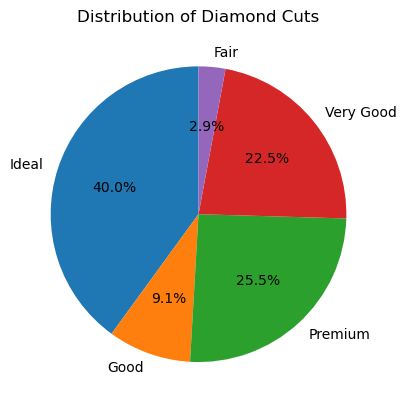

In [32]:
# distribution of diamond cut type categories in our dataset shown as a pie chart
cuts = ['Ideal', 'Good', 'Premium', 'Very Good', 'Fair']
cut_values = []

for cut in cuts:
    count = diamond_df[diamond_df['cut'] == cut]['cut'].count()
    cut_values.append(count)

# Plot the pie chart with percentage values
plt.pie(cut_values, labels=cuts, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diamond Cuts')
plt.show()

In [33]:
# Display the count of each color type
color_counts = diamond_df['color'].value_counts()
# Print the result
print("Count of diamonds for each color type:")
print(color_counts)

Count of diamonds for each color type:
G    85221
E    72595
F    70106
H    62998
D    50803
I    40264
J    21062
Name: color, dtype: int64


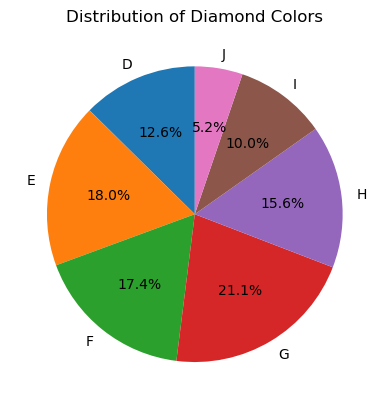

In [34]:
# distribution of diamond clolor categories in our dataset shown as a pie chart
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_values = []

for color in colors:
    count = diamond_df[diamond_df['color'] == color]['color'].count()
    color_values.append(count)

# Plot the pie chart with percentage values
plt.pie(color_values, labels=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diamond Colors')
plt.show()

In [35]:
# Display the count of each clarity type
clarity_counts = diamond_df['clarity'].value_counts()
# Print the result
print("Count of diamonds for each clarity type:")
print(clarity_counts)

Count of diamonds for each clarity type:
SI1     97876
VS2     91028
SI2     69242
VS1     60653
VVS2    37631
VVS1    28089
IF      13083
I1       5447
Name: clarity, dtype: int64


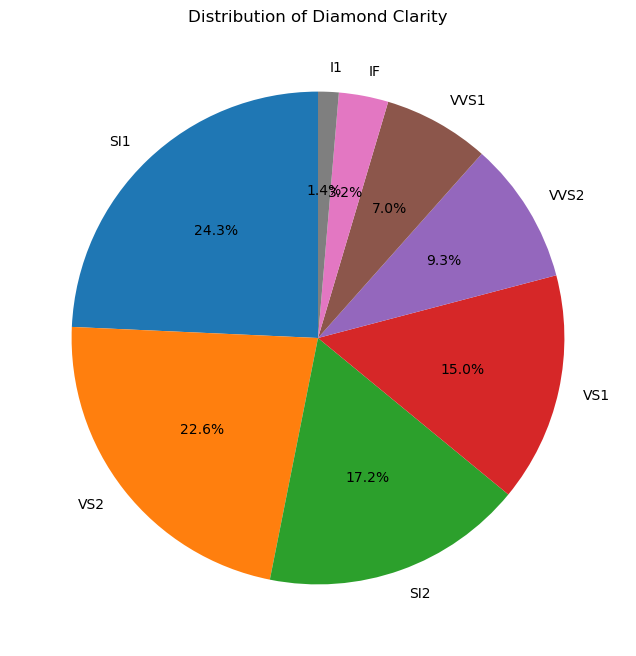

In [37]:
# distribution of diamond clarity categories in our dataset shown as a pie chart
clarity_categories = ['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
clarity_values = []

for clarity in clarity_categories:
    count = diamond_df[diamond_df['clarity'] == clarity]['clarity'].count()
    clarity_values.append(count)

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart with percentage values
plt.pie(clarity_values, labels=clarity_categories, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diamond Clarity')

# Show the pie chart
plt.show()

All possible clarity categories  ['VS1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'SI1' 'I1' 'IF']


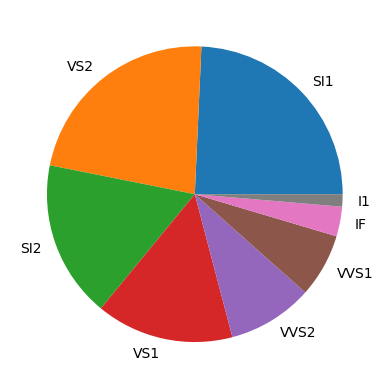

In [37]:
# distribution of diamond clarity categories in our dataset shown as a pie chart 
print("All possible clarity categories ",diamond_df['clarity'].unique())
clarity_categories = ['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
clarity_values = []
for clarity in clarity_categories:
    count = diamond_df[diamond_df['clarity']==clarity]['clarity'].count()
    clarity_values.append(count)
zz=plt.pie(clarity_values,labels=clarity_categories)

In [38]:
#how much do diamonds cost on average?
#Display the average price for each cut type
average_price_by_cut = diamond_df.groupby('cut')['cost_dollars'].mean()

# Print the result
print("Average price for each cut type:")
print(average_price_by_cut)

Average price for each cut type:
cut
Fair         4828.097935
Good         4378.448902
Ideal        3859.158092
Premium      5133.446845
Very Good    4469.439973
Name: cost_dollars, dtype: float64


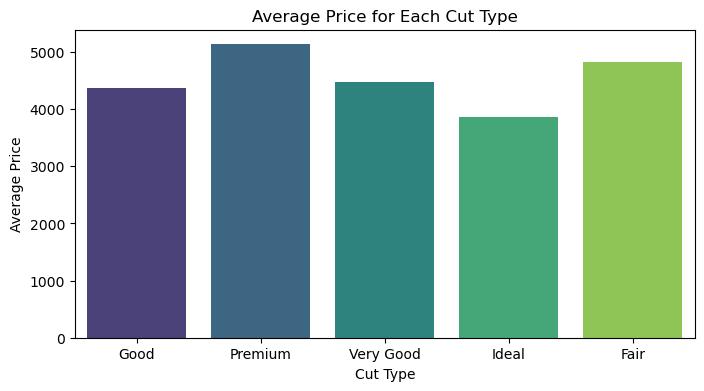

In [47]:
# Set the style of Seaborn
#sns.set(style="whitegrid")

# Create a bar plot to visualize the average price for each cut type
plt.figure(figsize=(8, 4))
sns.barplot(x='cut', y='cost_dollars', data=diamond_df, palette="viridis", errorbar=None)
plt.title('Average Price for Each Cut Type')
plt.xlabel('Cut Type')
plt.ylabel('Average Price')
plt.show()

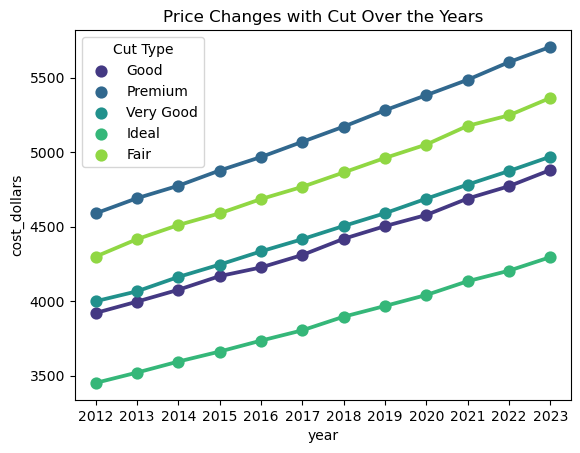

In [40]:
# Create a point plot to visualize how the price changes with cut over the years
#plt.figure(figsize=(12, 8))
sns.pointplot(x='year', y='cost_dollars', hue='cut', data=diamond_df, errorbar=None, palette="viridis")
plt.title('Price Changes with Cut Over the Years')
#plt.xlabel('Year')
#plt.ylabel('Price')
plt.legend(title='Cut Type')
plt.show()

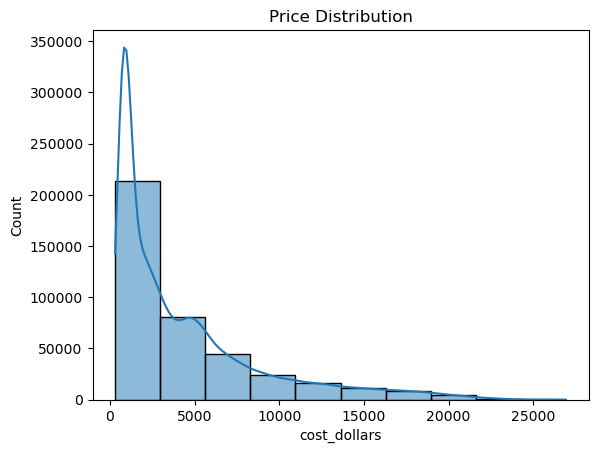

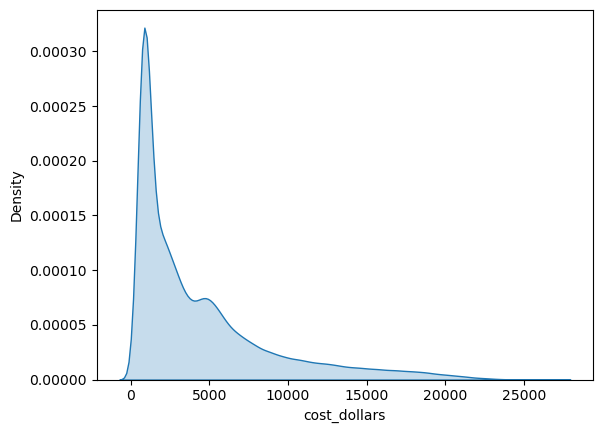

In [41]:
sns.histplot(diamond_df['cost_dollars'], bins=10, kde=True)
plt.title('Price Distribution')
plt.show()
sns.kdeplot(data = diamond_df, x = "cost_dollars", fill = "blue")
plt.show()

In [42]:
statistics = diamond_df['cost_dollars'].describe()
variance = statistics['std'] ** 2

print("Descriptive Statistics for Prices:")
print(statistics)
print("\nVariance of Prices:", variance)

Descriptive Statistics for Prices:
count    403049.000000
mean       4396.659143
std        4500.786342
min         304.000000
25%        1053.000000
50%        2676.000000
75%        5983.000000
max       26930.000000
Name: cost_dollars, dtype: float64

Variance of Prices: 20257077.697808135


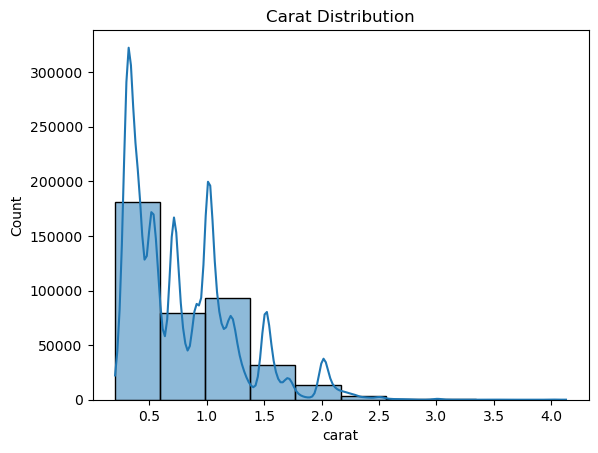

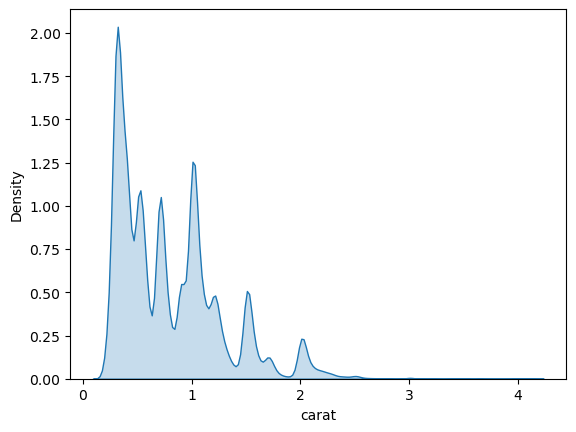

In [43]:
# distribution of carats in our dataset shown as a histogram
sns.histplot(diamond_df['carat'], bins=10, kde=True)
plt.title('Carat Distribution')
plt.show()
sns.kdeplot(data = diamond_df, x = "carat", fill = "blue")
plt.show()

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.histplot(df['cost_dollars'], bins=10, kde=True, color='lightgreen')
#plt.title('Histogram of Prices')
#plt.xlabel('Price')
#plt.ylabel('Frequency')
#plt.show()

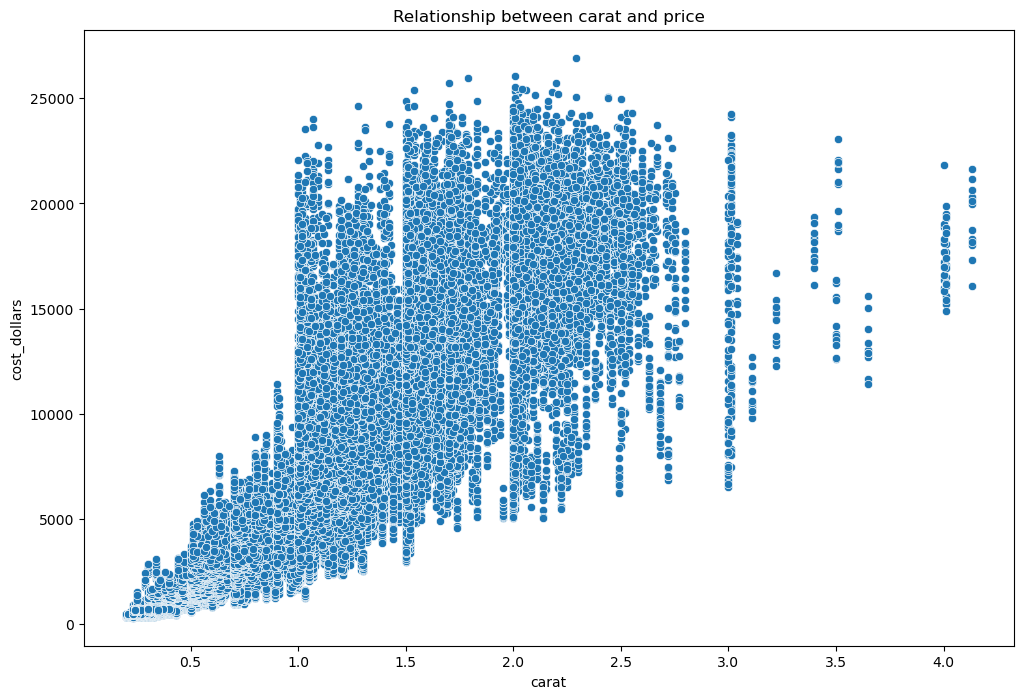

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='carat', y='cost_dollars', data=diamond_df)
plt.title('Relationship between carat and price')
plt.show()

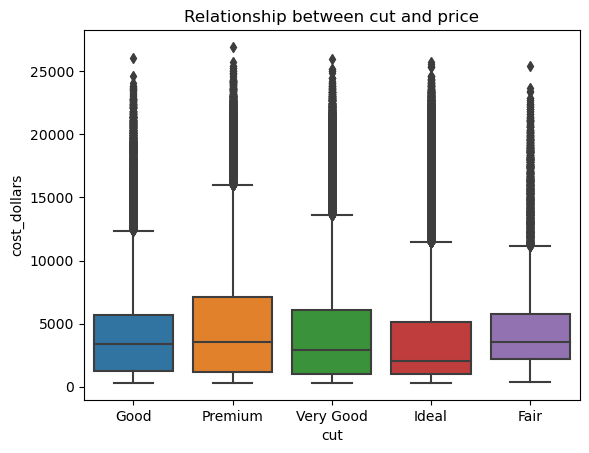

In [45]:
#plt.figure(figsize=(12, 8))
sns.boxplot(x='cut', y='cost_dollars', data=diamond_df)
plt.title('Relationship between cut and price')
plt.show()

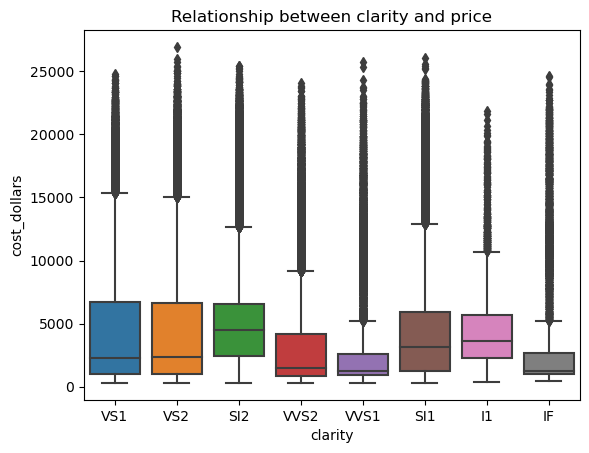

In [46]:
sns.boxplot(x='clarity', y='cost_dollars', data=diamond_df)
plt.title('Relationship between clarity and price')
plt.show()

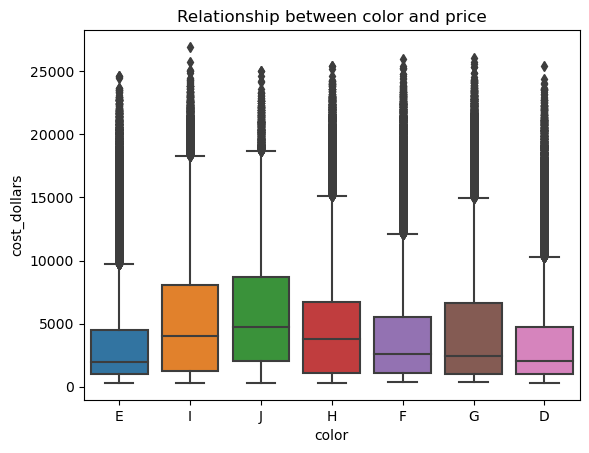

In [47]:
sns.boxplot(x='color', y='cost_dollars', data=diamond_df)
plt.title('Relationship between color and price')
plt.show()

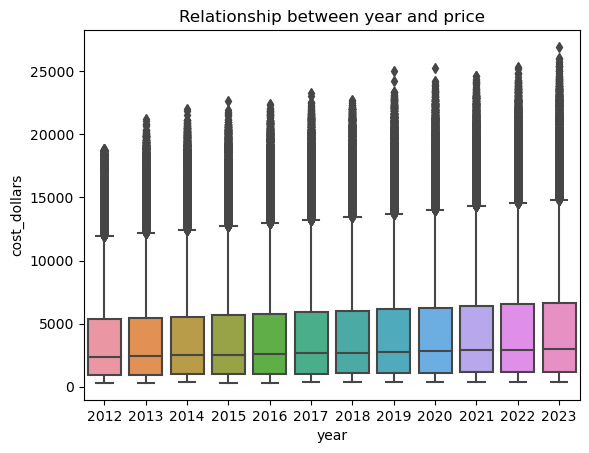

In [48]:
sns.boxplot(x='year', y='cost_dollars', data=diamond_df)
plt.title('Relationship between year and price')
plt.show()

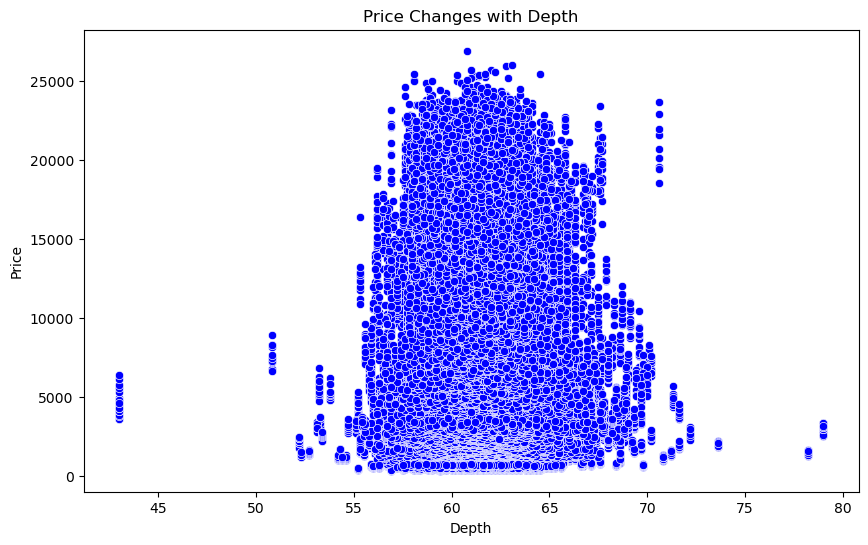

In [49]:
# Create a scatter plot or line plot to visualize how the price changes with depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='cost_dollars', data=diamond_df, marker='o', color='blue')
plt.title('Price Changes with Depth')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

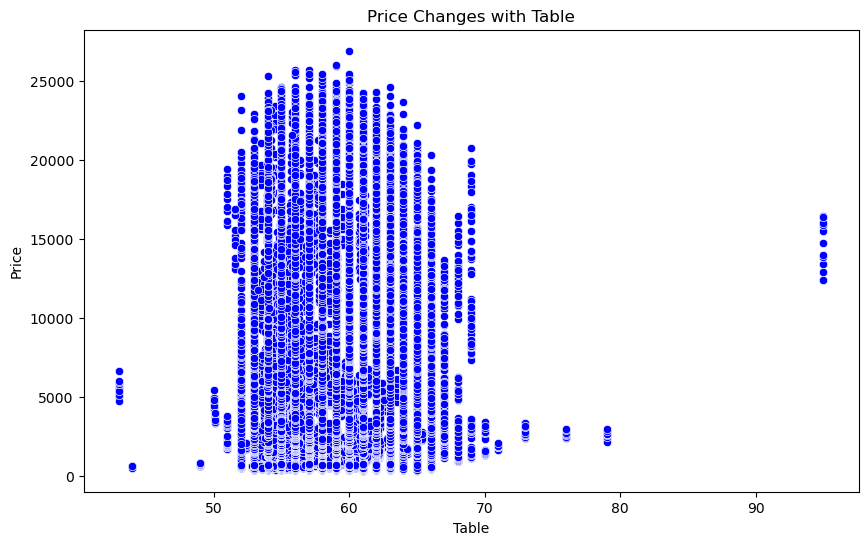

In [50]:
# Create a scatter plot or line plot to visualize how the price changes with depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='table', y='cost_dollars', data=diamond_df, marker='o', color='blue')
plt.title('Price Changes with Table')
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

In [ ]:
# Create a scatter plot or line plot to visualize how the price changes with depth
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='width_mm', y='cost_dollars', data=diamond_df, marker='o', color='blue')
#plt.title('Price Changes with Width')
#plt.xlabel('Width')
#plt.ylabel('Price')
#plt.show()

Correlation

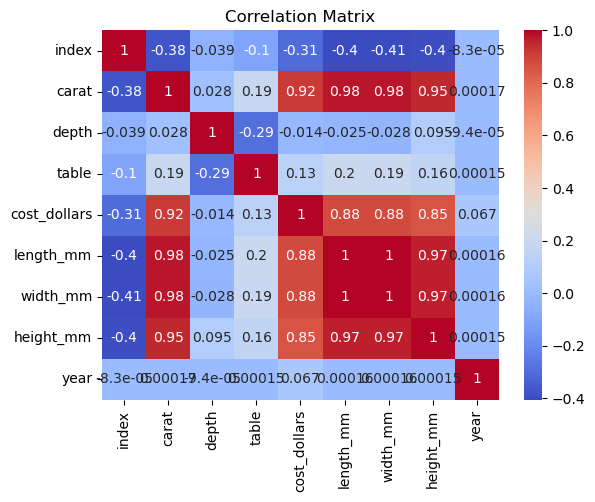

In [38]:
correlation_matrix = diamond_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

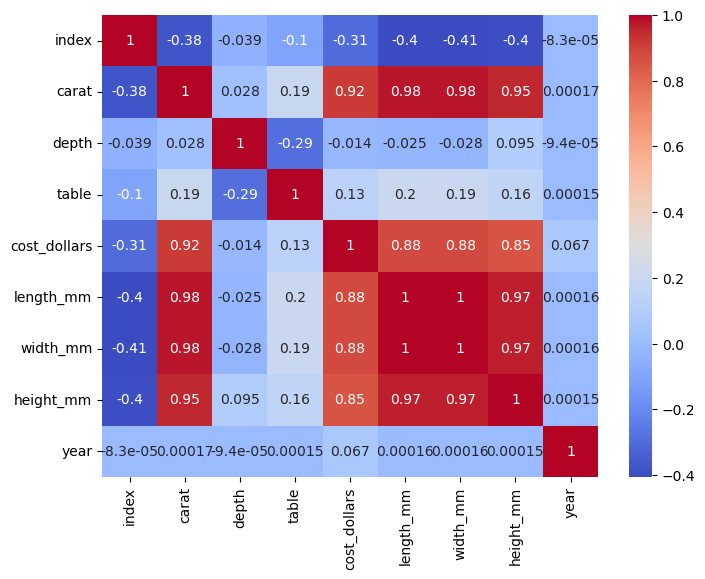

In [46]:
# Calculate the correlation matrix
correlation_matrix = diamond_df.corr(numeric_only=True)

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create and display the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
plt.show()

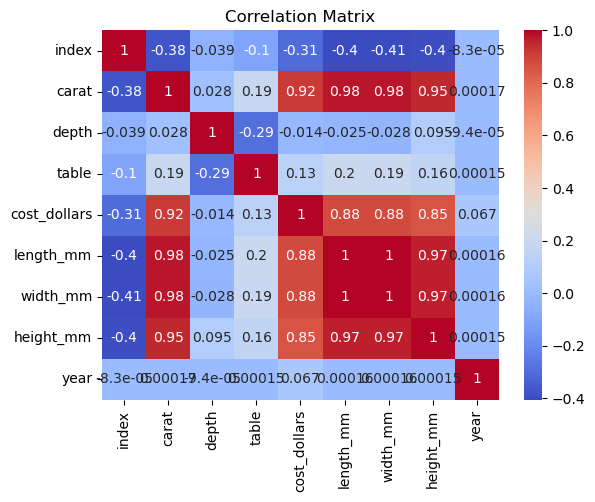

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to include numerical columns only
numeric_df = diamond_df.reset_index(drop=True).select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create and display the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Clustering with KMeans

In [65]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
# Select relevant features
clustering_features = diamond_df[['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']]

In [51]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(clustering_features)


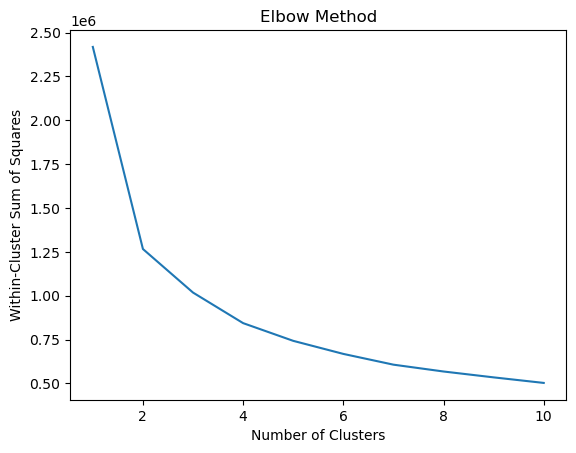

In [52]:
# Use the Elbow Method to find the optimal number of clusters
within_cluster_sum_of_squares = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_standardized)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


In [53]:
# Instantiate KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Add a new column 'cluster' to the DataFrame with cluster labels
diamond_df.loc[:, 'cluster'] = kmeans.fit_predict(features_standardized)

C:\Users\rhoda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rhoda\AppData\Local\Temp\ipykernel_58188\1968415052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamond_df.loc[:, 'cluster'] = kmeans.fit_predict(features_standardized)


In [54]:
# Choose the optimal number of clusters (e.g., 3 based on the Elbow Method)
k = 3

# Fit the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
diamond_df['cluster'] = kmeans.fit_predict(features_standardized)


C:\Users\rhoda\AppData\Local\Temp\ipykernel_58188\3655730713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamond_df['cluster'] = kmeans.fit_predict(features_standardized)


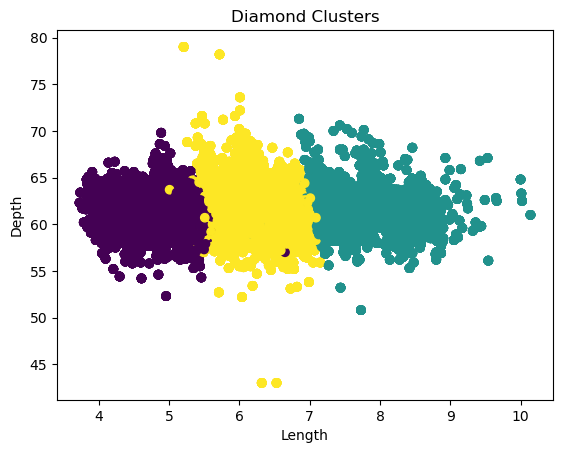

In [55]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['length_mm'], diamond_df['depth'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.title('Diamond Clusters')
plt.show()

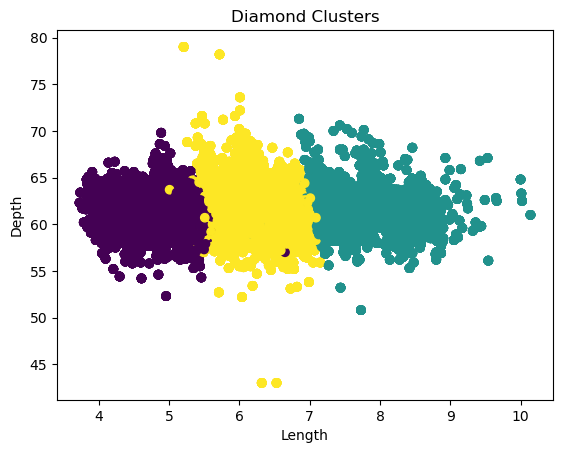

In [56]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['length_mm'], diamond_df['depth'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.title('Diamond Clusters')
plt.show()

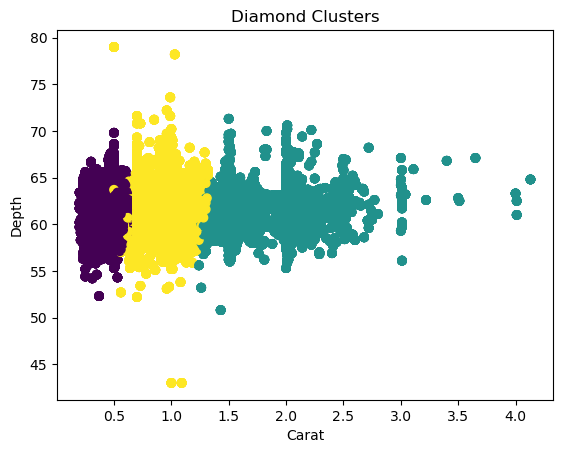

In [64]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['carat'], diamond_df['depth'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Depth')
plt.title('Diamond Clusters')
plt.show()

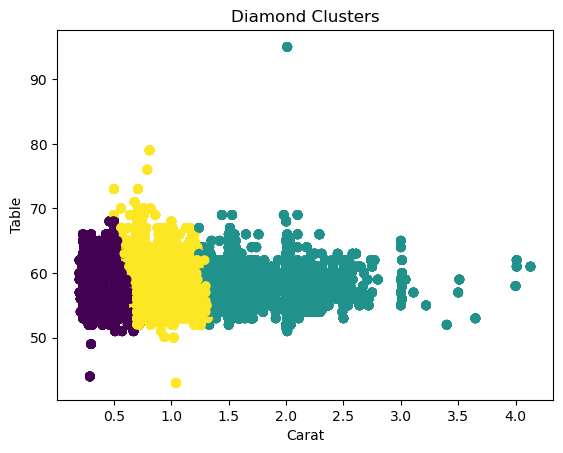

In [57]:
# Visualize the clusters (example using the first two features)
plt.scatter(diamond_df['carat'], diamond_df['table'], c=diamond_df['cluster'], cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Table')
plt.title('Diamond Clusters')
plt.show()

In [60]:
# Assuming clustering_features is the subset of features used for clustering
clustering_features = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']

# Select the features for clustering
X = diamond_df[clustering_features]

# Specify the number of clusters
n_clusters = 3

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model and get cluster labels
diamond_df['cluster_labels'] = kmeans.fit_predict(X)

# Display the first few rows of the DataFrame with cluster labels
print(diamond_df.head())

C:\Users\rhoda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   index  carat        cut color clarity  depth  table  cost_dollars  \
1      1   0.23       Good     E     VS1   56.9   65.0           327   
2      2   0.29    Premium     I     VS2   62.4   58.0           334   
3      3   0.31       Good     J     SI2   63.3   58.0           335   
4      4   0.24  Very Good     J    VVS2   62.8   57.0           336   
5      5   0.24  Very Good     I    VVS1   62.3   57.0           336   

   length_mm  width_mm  height_mm  year  cluster  cluster_labels  
1       4.05      4.07       2.31  2012        0               0  
2       4.20      4.23       2.63  2012        0               2  
3       4.34      4.35       2.75  2012        0               2  
4       3.94      3.96       2.48  2012        0               2  
5       3.95      3.98       2.47  2012        0               2  


C:\Users\rhoda\AppData\Local\Temp\ipykernel_58188\2990888654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamond_df['cluster_labels'] = kmeans.fit_predict(X)


In [61]:
# Display descriptive statistics for each cluster
cluster_statistics = diamond_df.groupby('cluster_labels')[clustering_features].describe()

# Flatten the multi-level columns for better readability
cluster_statistics.columns = ['_'.join(col).strip() for col in cluster_statistics.columns.values]

# Print or display the descriptive statistics for each cluster
print(cluster_statistics)

                carat_count  carat_mean  carat_std  carat_min  carat_25%  \
cluster_labels                                                             
0                   96333.0    0.825427   0.441681       0.20       0.46   
1                  131070.0    1.244008   0.393202       0.35       1.01   
2                  175646.0    0.449090   0.155005       0.20       0.32   

                carat_50%  carat_75%  carat_max  depth_count  depth_mean  ...  \
cluster_labels                                                            ...   
0                    0.73       1.02       3.01      96333.0   60.710043  ...   
1                    1.11       1.50       4.13     131070.0   62.265802  ...   
2                    0.40       0.54       1.12     175646.0   61.930761  ...   

                width_mm_75%  width_mm_max  height_mm_count  height_mm_mean  \
cluster_labels                                                                
0                       6.53          9.38          963

In [ ]:
# Display descriptive statistics for each cluster
#cluster_statistics = diamond_df.groupby('cluster_labels')[clustering_features].describe()

# Flatten the multi-level columns for better readability
#cluster_statistics.columns = ['_'.join(col).strip() for col in cluster_statistics.columns.values]

# Print or display the descriptive statistics for each cluster
#print(cluster_statistics)

Correlation

In [ ]:
# Select only numeric columns
#numeric_columns = diamond_df.select_dtypes(include='number')

# Calculate the correlation matrix
#correlation_matrix = numeric_columns.corr()

# Reset the index to avoid including it in the heatmap
#correlation_matrix_reset_index = correlation_matrix.reset_index(drop=True)

# Plot the heatmap
#sns.heatmap(correlation_matrix_reset_index, annot=True, cmap='coolwarm', xticklabels=correlation_matrix_reset_index.columns, yticklabels=correlation_matrix_reset_index.columns)
#plt.title('Correlation Matrix')
#plt.show()